<a href="https://colab.research.google.com/github/avahuu/nyt_archived/blob/main/nyt_archived.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
news_df = pd.read_json("/content/drive/MyDrive/github/nyt_archived/data/nyt_articles.txt")
news_df

,web_url,pub_date,lead_paragraph
0,https://www.nytimes.com/2020/01/01/well/move/e...,2020-01-01T10:00:13+0000,"If, like many of us, your New Year’s resolutio..."
1,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T14:42:43+0000,ROME — Pope Francis apologized on Wednesday fo...
2,https://www.nytimes.com/2020/01/01/opinion/nor...,2020-01-01T16:00:09+0000,"Is anyone surprised? On the last day of 2019, ..."
3,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T16:40:31+0000,Three women who flew paper sky lanterns to cel...
4,https://www.nytimes.com/2020/01/01/parenting/m...,2020-01-01T17:20:06+0000,"Happy New Year! On this first day of 2020, I’m..."
...,...,...,...
8049,https://www.nytimes.com/2022/12/05/special-ser...,2022-12-05T15:00:07+0000,This personal reflection is part of a series c...
8050,https://www.nytimes.com/interactive/2023/us/me...,2023-03-28T12:00:00+0000,See the latest charts and maps of virus hospit...
8051,https://www.nytimes.com/interactive/2021/07/16...,2021-07-16T13:04:51+0000,"Because of the pandemic, it had been 500 days ..."
8052,https://www.nytimes.com/2022/02/07/us/politics...,2022-02-08T02:07:05+0000,"WASHINGTON — Eric S. Lander, the president’s t..."


In [ ]:
dates = pd.DataFrame(index=news_df.index)

dates["Year"] = news_df["pub_date"].str.extract(r"^(\d{4})", expand=False)
dates["Month"] = news_df["pub_date"].str.extract(r"-(\d{2})-", expand=False)
dates["Minute"] = news_df["pub_date"].str.extract(r"T\d{2}:(\d{2}):", expand=False)

dates = dates.astype(int)

news_df_dates = news_df.merge(
    right=dates,
    left_index=True,
    right_index=True
)
news_df_dates.head()

,web_url,pub_date,lead_paragraph,Year,Month,Minute
0,https://www.nytimes.com/2020/01/01/well/move/e...,2020-01-01T10:00:13+0000,"If, like many of us, your New Year’s resolutio...",2020,1,0
1,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T14:42:43+0000,ROME — Pope Francis apologized on Wednesday fo...,2020,1,42
2,https://www.nytimes.com/2020/01/01/opinion/nor...,2020-01-01T16:00:09+0000,"Is anyone surprised? On the last day of 2019, ...",2020,1,0
3,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T16:40:31+0000,Three women who flew paper sky lanterns to cel...,2020,1,40
4,https://www.nytimes.com/2020/01/01/parenting/m...,2020-01-01T17:20:06+0000,"Happy New Year! On this first day of 2020, I’m...",2020,1,20


In [ ]:
quarters = ((news_df_dates["Month"] - 1) // 3 + 1).astype(str)

# Concatenate Year + "Q" + Quarter
news_df_dates["Quarter"] = news_df_dates["Year"].astype(str) + "Q" + quarters

In [ ]:
#investigate popularity trends of three topics: China, Zoom, Labubu, and GPT models

patterns = {
    "China":  r"\bChina\b",
    "Labubu": r"\bLabubu(s)?\b",
    "Zoom": r"\bZoom\b",
    "GPT Model": r"(?:\b[A-Za-z]+-?GPT\b|\bGPT-\d[A-Za-z]?\b)",
}

for col, pat in patterns.items():
    news_df_dates[col] = (
        news_df_dates["lead_paragraph"]
        .str.count(pat)               # regex by default, case-sensitive
        .fillna(0)
        .astype(int)
    )

news_df_dates

,web_url,pub_date,lead_paragraph,Year,Month,Minute,Quarter,New Year,Zoom,GPT Model,Labubu,China
0,https://www.nytimes.com/2020/01/01/well/move/e...,2020-01-01T10:00:13+0000,"If, like many of us, your New Year’s resolutio...",2020,1,0,2020Q1,1,0,0,0,0
1,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T14:42:43+0000,ROME — Pope Francis apologized on Wednesday fo...,2020,1,42,2020Q1,1,0,0,0,0
2,https://www.nytimes.com/2020/01/01/opinion/nor...,2020-01-01T16:00:09+0000,"Is anyone surprised? On the last day of 2019, ...",2020,1,0,2020Q1,1,0,0,0,0
3,https://www.nytimes.com/2020/01/01/world/europ...,2020-01-01T16:40:31+0000,Three women who flew paper sky lanterns to cel...,2020,1,40,2020Q1,1,0,0,0,0
4,https://www.nytimes.com/2020/01/01/parenting/m...,2020-01-01T17:20:06+0000,"Happy New Year! On this first day of 2020, I’m...",2020,1,20,2020Q1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8049,https://www.nytimes.com/2022/12/05/special-ser...,2022-12-05T15:00:07+0000,This personal reflection is part of a series c...,2022,12,0,2022Q4,0,0,0,0,0
8050,https://www.nytimes.com/interactive/2023/us/me...,2023-03-28T12:00:00+0000,See the latest charts and maps of virus hospit...,2023,3,0,2023Q1,0,0,0,0,0
8051,https://www.nytimes.com/interactive/2021/07/16...,2021-07-16T13:04:51+0000,"Because of the pandemic, it had been 500 days ...",2021,7,4,2021Q3,0,0,0,0,0
8052,https://www.nytimes.com/2022/02/07/us/politics...,2022-02-08T02:07:05+0000,"WASHINGTON — Eric S. Lander, the president’s t...",2022,2,7,2022Q1,0,0,0,0,0


In [ ]:
# The values are the number of articles that mentioned each topic in each quarter

topics = ["China","Labubu", "Zoom", "GPT Model"]

def num_mentioned(ser):
    return (ser > 0).sum()

topic_mentions = (
    news_df_dates
    .groupby("Quarter")[topics]
    .agg(num_mentioned)
    .sort_index()
)

# Year 2023 records
topic_mentions

,China,Labubu,Zoom,GPT Model
Quarter,,,,
2019Q1,2,0,0,0
2019Q2,7,0,0,0
2019Q3,8,0,0,0
2019Q4,4,0,0,0
2020Q1,17,0,8,0
2020Q2,7,0,84,0
2020Q3,8,0,64,0
2020Q4,9,0,61,2
2021Q1,8,0,38,0


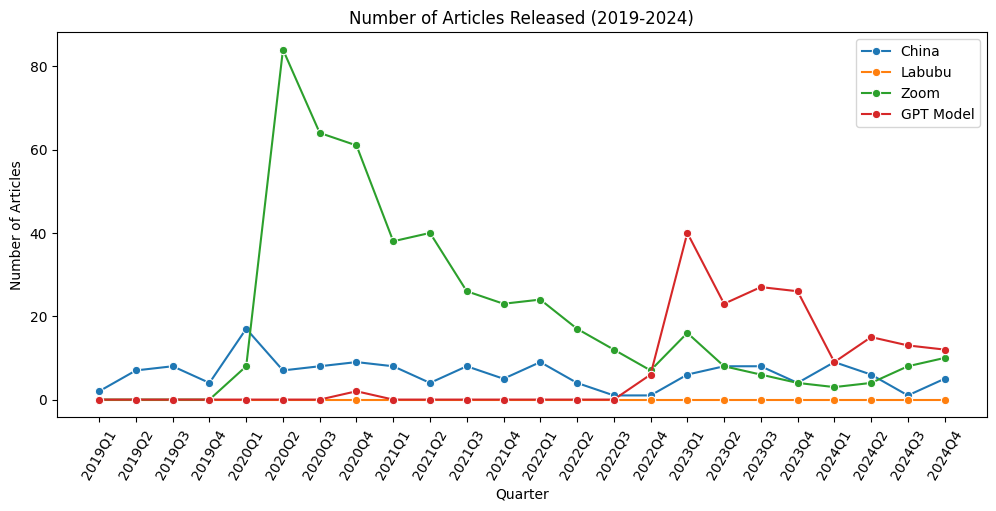

In [ ]:
#visualization

plt.figure(figsize=(12, 5))

for topic in topics:
    sns.lineplot(data=topic_mentions, x="Quarter", y=topic, marker="o", label=topic)

plt.xticks(rotation=60)
plt.yticks()
plt.ylabel("Number of Articles")
plt.xlabel("Quarter")
plt.title("Number of Articles Released (2019-2024)")
plt.gcf().set_facecolor('white')
plt.show()

In [ ]:
# Sentiment Analysis
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

import torch
from transformers import pipeline

# 2)
model_checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

device = 0 if torch.cuda.is_available() else -1

sentiment_analysis = pipeline(
    task="sentiment-analysis",
    model=model_checkpoint,
    device=device
)

texts = news_df_dates["lead_paragraph"].fillna("").tolist()

results = sentiment_analysis(
    texts,
    truncation=True,
    max_length=256,
    batch_size=32
)

nyt_sentiments = pd.DataFrame(results, index=news_df_dates.index)

nyt_sentiments["sentiment_sign"] = nyt_sentiments["label"].map({"POSITIVE": 1, "NEGATIVE": -1})
nyt_sentiments["score_signed"] = nyt_sentiments["score"] * nyt_sentiments["sentiment_sign"]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sentiment = nyt_sentiments

In [ ]:
sentiment["article_sentiment"] = (
    (2*(sentiment["label"] == "POSITIVE") - 1) * sentiment["score"]
)
news_df_sentiment = news_df_dates.merge(sentiment, on="web_url")
news_df_sentiment = news_df_sentiment.drop(columns=["label", "score"])

KeyError: 'web_url'